# MLToolKit Regression Example
## Generated Dataset
Create Date: July 15, 2019; Last Update: August 31, 2019. 
Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)
<hr>

### Current release: PyMLToolKit [v0.1.7]

MLToolkit (mltk) is a Python package providing a set of user-friendly functions to help building machine learning models in data science research, teaching or production focused projects. MLToolkit supports all stages of the machine learning application development process.

### Installation
```
pip install pymltoolkit
```
If the installation failed with dependancy issues, execute the above command with --no-dependencies

```
pip install pymltoolkit --no-dependencies
```

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import mltk

mltk==0.1.7


# 1. Generate Synthetic Dataset

,x,A,B,C,D,k,y,noise_amp,measured
0,0.10000,0.10000,0.09983,24.01000,0.31623,1,5.02914,0.3,4.92837
1,0.10398,0.10398,0.10379,23.97100,0.32246,1,5.04256,0.3,4.98988
2,0.10796,0.10796,0.10775,23.93204,0.32858,1,5.05583,0.3,5.61639
3,0.11194,0.11194,0.11171,23.89311,0.33458,1,5.06897,0.3,4.66729
4,0.11592,0.11592,0.11566,23.85421,0.34047,1,5.08198,0.3,5.39042


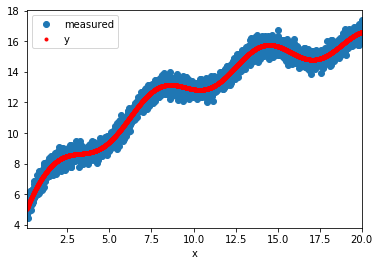

In [2]:
nsample = 5000
min_val = 0.1
max_val = 20
x = np.linspace(min_val, max_val, nsample)
noise_amp = 0.3

A = x
B = np.sin(x)
C = (x-5)**2
D = np.sqrt(x)
k = 1

y = 0.5*A + 0.8*B + -0.02*C + 1.2*D + 5*k 
measured = y +  noise_amp * np.random.normal(size=nsample)

data = {'x':x, 'A':A, 'B':B, 'C':C, 'D':D, 'k':k, 'y':y, 'noise_amp':noise_amp, 'measured':measured}
Data = pd.DataFrame(data=data)

Data.plot(x='x', y=['measured', 'y'], style=['o', 'r.'])

Data.head()

# 2. Explore Features

In [3]:
identifierColumns = ['x']
categoryVariables = ['AGRP', 'BGRP', 'CGRP', 'DGRP']
binaryVariables = []
targetVariable = 'measured'

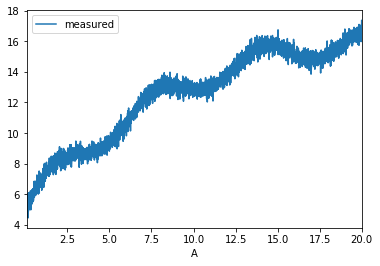

In [4]:
Data.plot(x='A', y='measured')

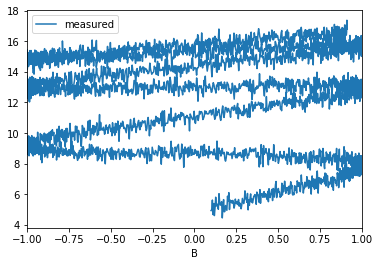

In [5]:
Data.plot(x='B', y='measured')

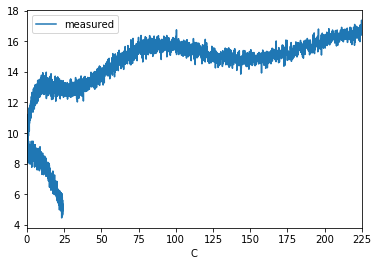

In [6]:
Data.plot(x='C', y='measured')

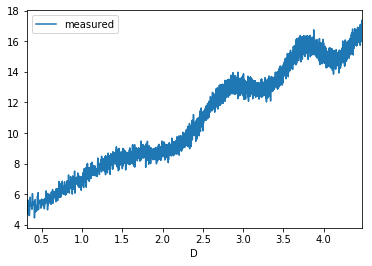

In [7]:
Data.plot(x='D', y='measured')

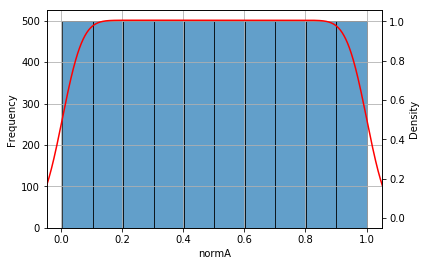

,counts,density
normA,,
"1_[0.005,0.1045]",500,1.01
"2_[0.1045,0.204]",500,1.01
"3_[0.204,0.3035]",500,1.01
"4_[0.3035,0.403]",500,1.01
"5_[0.403,0.5025]",500,1.01
"6_[0.5025,0.602]",500,1.01
"7_[0.602,0.7015]",500,1.01
"8_[0.7015,0.801]",500,1.01
"9_[0.801,0.9005]",500,1.01


In [8]:
rule_set = {
    "operation":"normalize", 
    'variables': {
        'source':'A', 
        'destination':'normA'
    },
    "parameters":{"method":"maxscale"}
}
Data, transformed_variable = mltk.create_transformed_variable_task(Data, rule_set, return_variable=True)
table = mltk.histogram(Data, variable=transformed_variable, n_bins=10, orientation='vertical', density=True, show_plot=True)
table.style.background_gradient(cmap='Greens').set_precision(3)

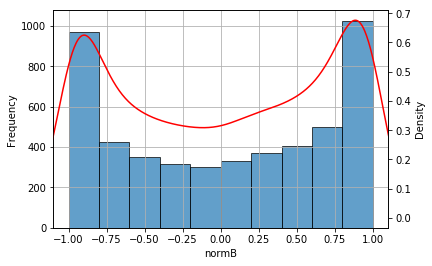

,counts,density
normB,,
"1_[-1,-0.8]",970,0.97
"2_[-0.8,-0.6]",427,0.427
"3_[-0.6,-0.4]",350,0.35
"4_[-0.4,-0.2]",317,0.317
"5_[-0.2,-8.82371e-08]",304,0.304
"6_[-8.82371e-08,0.2]",329,0.329
"7_[0.2,0.4]",370,0.37
"8_[0.4,0.6]",407,0.407
"9_[0.6,0.8]",499,0.499


In [9]:
rule_set = {
    "operation":"normalize", 
    'variables': {
        'source':'B', 
        'destination':'normB'
    },
    "parameters":{"method":"maxscale"}
}
Data, transformed_variable = mltk.create_transformed_variable_task(Data, rule_set, return_variable=True)
table = mltk.histogram(Data, variable=transformed_variable, n_bins=10, orientation='vertical', density=True, show_plot=True)
table.style.background_gradient(cmap='Greens').set_precision(3)

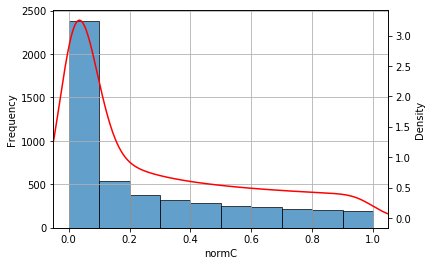

,counts,density
normC,,
"1_[5.7623e-10,0.1]",2383,4.77
"2_[0.1,0.2]",534,1.07
"3_[0.2,0.3]",378,0.756
"4_[0.3,0.4]",320,0.64
"5_[0.4,0.5]",281,0.562
"6_[0.5,0.6]",254,0.508
"7_[0.6,0.7]",234,0.468
"8_[0.7,0.8]",218,0.436
"9_[0.8,0.9]",204,0.408


In [10]:
rule_set = {
    "operation":"normalize", 
    'variables': {
        'source':'C', 
        'destination':'normC'
    },
    "parameters":{"method":"maxscale"}
}
Data, transformed_variable = mltk.create_transformed_variable_task(Data, rule_set, return_variable=True)
table = mltk.histogram(Data, variable=transformed_variable, n_bins=10, orientation='vertical', density=True, show_plot=True)
table.style.background_gradient(cmap='Greens').set_precision(3)

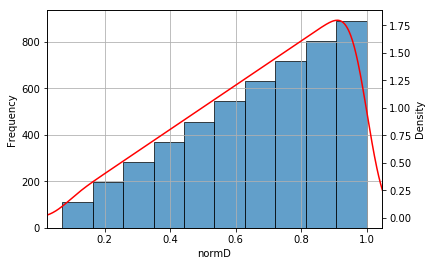

,counts,density
normD,,
"1_[0.0707107,0.16364]",110,0.237
"2_[0.16364,0.256569]",196,0.422
"3_[0.256569,0.349497]",283,0.609
"4_[0.349497,0.442426]",370,0.796
"5_[0.442426,0.535355]",456,0.981
"6_[0.535355,0.628284]",544,1.17
"7_[0.628284,0.721213]",630,1.36
"8_[0.721213,0.814142]",717,1.54
"9_[0.814142,0.907071]",803,1.73


In [11]:
rule_set = {
    "operation":"normalize", 
    'variables': {
        'source':'D', 
        'destination':'normD'
    },
    "parameters":{"method":"maxscale"}
}
Data, transformed_variable = mltk.create_transformed_variable_task(Data, rule_set, return_variable=True)
table = mltk.histogram(Data, variable=transformed_variable, n_bins=10, orientation='vertical', density=True, show_plot=True)
table.style.background_gradient(cmap='Greens').set_precision(3)

In [12]:
rule_set = {
    "operation":"normalize", 
    'variables': {
        'source':'k', 
        'destination':'normk'
    },
    "parameters":{"method":"maxscale"}
}
Data, transformed_variable = mltk.create_transformed_variable_task(Data, rule_set, return_variable=True)
#table = mltk.histogram(Data, variable=transformed_variable, n_bins=10, orientation='vertical', density=True, show_plot=True)
#table.style.background_gradient(cmap='Greens').set_precision(3)

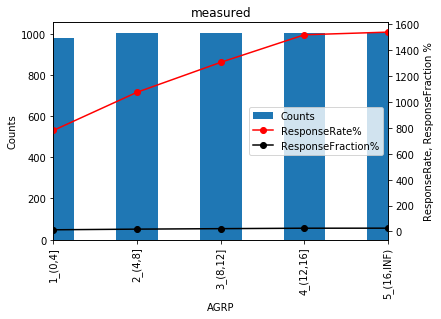

,Counts,measured,CountsFraction%,ResponseFraction%,ResponseRate%
AGRP,,,,,
"1_(0,4]",980,7651,19.6,12.26771,780.71429
"2_(4,8]",1005,10812,20.1,17.33609,1075.82090
"3_(8,12]",1005,13138,20.1,21.06563,1307.26368
"4_(12,16]",1005,15280,20.1,24.50014,1520.39801
"5_(16,INF)",1005,15486,20.1,24.83044,1540.89552
TOTAL,5000,62367,100.0,100.00000,1247.34000


In [13]:
rule_set = {   
    'operation':'bucket',
    'variables': {
        'source':'A', 
        'destination':None
    },
    'parameters': {
        'labels_str': ['0', '4', '8', '12', '16', 'INF'],
        'right_inclusive':True,
        "default":'OTHER',
        "null": 'NA'
    }
}
Data, categoryVariable = mltk.create_categorical_variable_task(Data, rule_set, return_variable=True)
mltk.variable_response(DataFrame=Data, variable=categoryVariable, target_variable=targetVariable, show_plot=True)

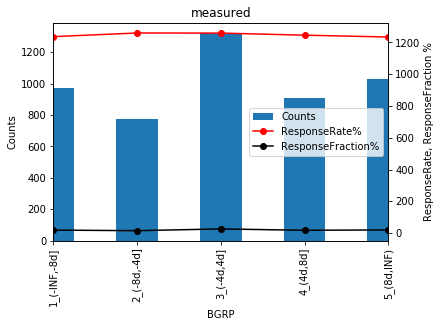

,Counts,measured,CountsFraction%,ResponseFraction%,ResponseRate%
BGRP,,,,,
"1_(-INF,-8d]",970,11997,19.40,19.23583,1236.80412
"2_(-8d,-4d]",777,9787,15.54,15.69234,1259.58816
"3_(-4d,4d]",1320,16620,26.40,26.64828,1259.09091
"4_(4d,8d]",906,11287,18.12,18.09742,1245.80574
"5_(8d,INF)",1027,12677,20.54,20.32613,1234.37196
TOTAL,5000,62368,100.00,100.00000,1247.36000


In [14]:
rule_set = {   
    'operation':'bucket',
    'variables': {
        'source':'B', 
        'destination':None
    },
    'parameters': {
        'labels_str': ['-INF', '-8d', '-4d', '4d', '8d','INF'],
        'right_inclusive':True,
        "default":'OTHER',
        "null": 'NA'
    }
}
Data, categoryVariable = mltk.create_categorical_variable_task(Data, rule_set, return_variable=True)
mltk.variable_response(DataFrame=Data, variable=categoryVariable, target_variable=targetVariable, show_plot=True)

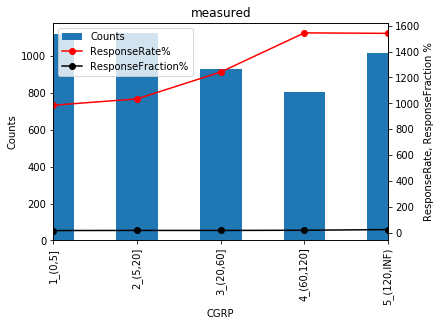

,Counts,measured,CountsFraction%,ResponseFraction%,ResponseRate%
CGRP,,,,,
"1_(0,5]",1123,11070,22.46,17.74949,985.75245
"2_(5,20]",1124,11628,22.48,18.64418,1034.51957
"3_(20,60]",930,11552,18.60,18.52232,1242.15054
"4_(60,120]",806,12449,16.12,19.96056,1544.54094
"5_(120,INF)",1017,15669,20.34,25.12346,1540.70796
TOTAL,5000,62368,100.00,100.00000,1247.36000


In [15]:
rule_set = {   
    'operation':'bucket',
    'variables': {
        'source':'C', 
        'destination':None
    },
    'parameters': {
        'labels_str': ['0', '5', '20', '60', '120', 'INF'],
        'right_inclusive':True,
        "default":'OTHER',
        "null": 'NA'
    }
}
Data, categoryVariable = mltk.create_categorical_variable_task(Data, rule_set, return_variable=True)
mltk.variable_response(DataFrame=Data, variable=categoryVariable, target_variable=targetVariable, show_plot=True)

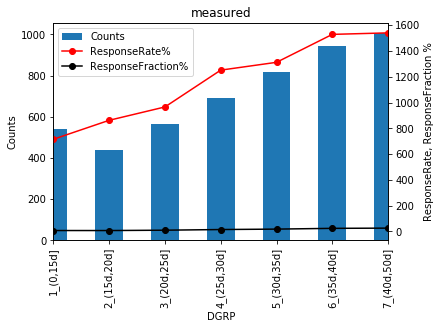

,Counts,measured,CountsFraction%,ResponseFraction%,ResponseRate%
DGRP,,,,,
"1_(0,15d]",541,3867,10.82,6.20039,714.78743
"2_(15d,20d]",439,3784,8.78,6.06731,861.95900
"3_(20d,25d]",565,5456,11.30,8.74822,965.66372
"4_(25d,30d]",691,8648,13.82,13.86631,1251.51954
"5_(30d,35d]",817,10721,16.34,17.19018,1312.23990
"6_(35d,40d]",942,14405,18.84,23.09715,1529.19321
"7_(40d,50d]",1005,15486,20.10,24.83044,1540.89552
TOTAL,5000,62367,100.00,100.00000,1247.34000


In [16]:
rule_set = {   
    'operation':'bucket',
    'variables': {
        'source':'D', 
        'destination':None
    },
    'parameters': {
        'labels_str': ['0', '15d', '20d', '25d', '30d', '35d', '40d', '50d', 'INF'],
        'right_inclusive':True,
        "default":'OTHER',
        "null": 'NA'
    }
}
Data, categoryVariable = mltk.create_categorical_variable_task(Data, rule_set, return_variable=True)
mltk.variable_response(DataFrame=Data, variable=categoryVariable, target_variable=targetVariable, show_plot=True)

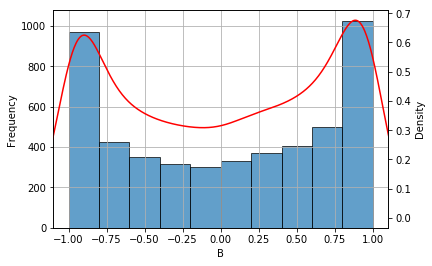

,counts,density
B,,
"1_[-1,-0.8]",970,0.97
"2_[-0.8,-0.6]",427,0.427
"3_[-0.6,-0.4]",350,0.35
"4_[-0.4,-0.2]",317,0.317
"5_[-0.2,-8.82371e-08]",304,0.304
"6_[-8.82371e-08,0.2]",329,0.329
"7_[0.2,0.4]",370,0.37
"8_[0.4,0.6]",407,0.407
"9_[0.6,0.8]",499,0.499


In [17]:
table = mltk.histogram(Data, variable='B', n_bins=10, orientation='vertical', density=True, show_plot=True)
table.style.background_gradient(cmap='Greens').set_precision(3)

## One-Hot Encode

In [18]:
Data, featureVariables, targetVariable = mltk.to_one_hot_encode(Data, category_variables=categoryVariables, binary_variables=binaryVariables, target_variable=targetVariable)
Data[identifierColumns+featureVariables+[targetVariable]].sample(5).transpose()

,3677,3303,1135,3255,3050
x,14.73739,13.24857,4.61820,13.05749,12.24143
"AGRP_1_(0,4]",0.00000,0.00000,0.00000,0.00000,0.00000
"AGRP_2_(4,8]",0.00000,0.00000,1.00000,0.00000,0.00000
"AGRP_3_(8,12]",0.00000,0.00000,0.00000,0.00000,0.00000
"AGRP_4_(12,16]",1.00000,1.00000,0.00000,1.00000,1.00000
"AGRP_5_(16,INF)",0.00000,0.00000,0.00000,0.00000,0.00000
"BGRP_1_(-INF,-8d]",0.00000,0.00000,1.00000,0.00000,0.00000
"BGRP_2_(-8d,-4d]",0.00000,0.00000,0.00000,0.00000,0.00000
"BGRP_3_(-4d,4d]",0.00000,0.00000,0.00000,0.00000,1.00000
"BGRP_4_(4d,8d]",0.00000,1.00000,0.00000,1.00000,0.00000


## 3. Split Train, Validate, Test

In [19]:
TrainDataset, ValidateDataset, TestDataset = mltk.train_validate_test_split(Data, ratios=(0.6,0.4))

Validate = Test
Train Samples: 3000 [60.0%]
Validate Samples: 2000 [40.0%]
Test Samples: 2000 [40.0%]


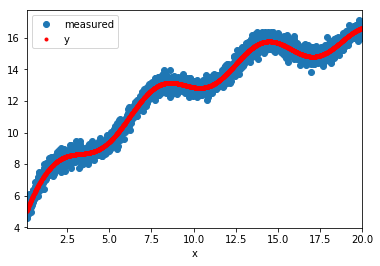

In [20]:
TrainDataset.plot(x='x', y=['measured', 'y'], style=['o', 'r.'])

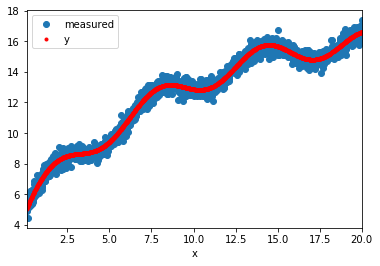

In [21]:
ValidateDataset.plot(x='x', y=['measured', 'y'], style=['o', 'r.'])

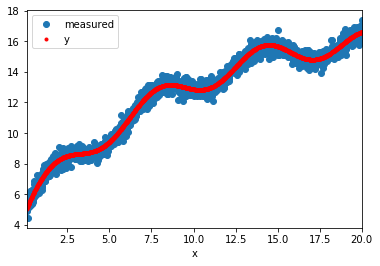

In [22]:
TestDataset.plot(x='x', y=['measured', 'y'], style=['o', 'r.'])

# 4. Setup Variables

In [23]:
modelVariables = ['A', 'B', 'C', 'D', 'k']
targetVariable = 'measured'

# 5. Setup Model

In [24]:
sample_attributes = {'SampleDescription':'Regression Example',
                    'NumClasses':2,
                    'RecordIdentifiers':[]
                    }

score_parameters = {'Edges':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    'Percentiles':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    'Threshold':0.0,
                   'Quantiles':10,
                   'ScoreVariable':'PredictedAmount',
                   'ScoreLabel':'Score',
                   'QuantileLabel':'Quantile',
                    'PredictedLabel':'Predicted'
                   }

model_attributes = {'ModelID': None,   
                   'ModelName': 'REGModel',
                   'Version':'0.1',
                    'ModelType':'regression'
                   }

## 5.1 Fit Linear Regression Model

In [25]:
model_parameters = {'MLAlgorithm':'LREG', 'MaxIterations':100}

### 5.1.1 Fit Using Raw Variables

In [26]:
LREGModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=False
                                  )

Train samples: 3000 loded...
Validate samples: 2000 loded...
Test samples: 2000 loded...
{'ModelID': 'REGMODELLREG20190901132656', 'ModelName': 'REGModel', 'Version': '0.1', 'ModelType': 'regression', 'MLTKVersion': '0.1.7', 'BuiltTime': '20190901132656', 'ModelFitTime': -1}
{'MLAlgorithm': 'LREG', 'MaxIterations': 100}
Regression Example
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Percentiles': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Threshold': 0.0, 'Quantiles': 10, 'ScoreVariable': 'PredictedAmount', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}


In [27]:
print(LREGModel.model_attributes['ModelID'])
print(LREGModel.model_interpretation['ModelSummary'])
print('RMSE:', LREGModel.get_rmse())
print('R^2: ', LREGModel.get_r2())

REGMODELLREG20190901132656
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.547e+04
Date:                Sun, 01 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:26:56   Log-Likelihood:                -594.55
No. Observations:                3000   AIC:                             1199.
Df Residuals:                    2995   BIC:                             1229.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A              0.5095    

In [28]:
LREGModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,MinPredictedAmount,MaxPredictedAmount,MeanPredictedAmount,BucketCount,PredictedAmount,ResponseAmount,BucketFraction,ResponseFraction,BucketMeanAmount,CumulativeBucketFraction,CumulativeResponseFraction,CumulativeMeanAmount
Quantile,,,,,,,,,,,,
1,5.07,8.14,6.92,200,1.38e+03,1.38e+03,0.1,0.0558,6.91,1,1,12.4
2,8.15,8.75,8.54,200,1.71e+03,1.71e+03,0.1,0.0691,8.56,0.9,0.944,13
3,8.75,10.6,9.45,200,1.89e+03,1.88e+03,0.1,0.0761,9.42,0.8,0.875,13.5
4,10.6,12.8,11.8,200,2.36e+03,2.35e+03,0.1,0.0951,11.8,0.7,0.799,14.1
5,12.8,13,12.9,200,2.58e+03,2.58e+03,0.1,0.104,12.9,0.6,0.704,14.5
6,13,13.5,13.1,200,2.63e+03,2.64e+03,0.1,0.107,13.2,0.5,0.6,14.8
7,13.5,14.8,14.4,200,2.88e+03,2.88e+03,0.1,0.117,14.4,0.4,0.493,15.2
8,14.8,15.3,15,200,3.01e+03,3.01e+03,0.1,0.121,15,0.3,0.376,15.5
9,15.3,15.7,15.5,200,3.1e+03,3.1e+03,0.1,0.125,15.5,0.2,0.255,15.8


### 5.1.2 Fit Using Normalized Variables

In [29]:
modelVariables = ['normA', 'normB', 'normC', 'normD', 'normk']
LREGModel2 = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=False
                                  )

print(LREGModel2.model_attributes['ModelID'])
print(LREGModel2.model_interpretation['ModelSummary'])
print('RMSE:', LREGModel2.get_rmse())
print('R^2: ', LREGModel2.get_r2())

LREGModel2.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

Train samples: 3000 loded...
Validate samples: 2000 loded...
Test samples: 2000 loded...
{'ModelID': 'REGMODELLREG20190901132657', 'ModelName': 'REGModel', 'Version': '0.1', 'ModelType': 'regression', 'MLTKVersion': '0.1.7', 'BuiltTime': '20190901132657', 'ModelFitTime': -1}
{'MLAlgorithm': 'LREG', 'MaxIterations': 100}
Regression Example
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Percentiles': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Threshold': 0.0, 'Quantiles': 10, 'ScoreVariable': 'PredictedAmount', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}
REGMODELLREG20190901132657
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.547e+04
Date:                Sun, 0

,MinPredictedAmount,MaxPredictedAmount,MeanPredictedAmount,BucketCount,PredictedAmount,ResponseAmount,BucketFraction,ResponseFraction,BucketMeanAmount,CumulativeBucketFraction,CumulativeResponseFraction,CumulativeMeanAmount
Quantile,,,,,,,,,,,,
1,5.07,8.14,6.92,200,1.38e+03,1.38e+03,0.1,0.0558,6.91,1,1,12.4
2,8.15,8.75,8.54,200,1.71e+03,1.71e+03,0.1,0.0691,8.56,0.9,0.944,13
3,8.75,10.6,9.45,200,1.89e+03,1.88e+03,0.1,0.0761,9.42,0.8,0.875,13.5
4,10.6,12.8,11.8,200,2.36e+03,2.35e+03,0.1,0.0951,11.8,0.7,0.799,14.1
5,12.8,13,12.9,200,2.58e+03,2.58e+03,0.1,0.104,12.9,0.6,0.704,14.5
6,13,13.5,13.1,200,2.63e+03,2.64e+03,0.1,0.107,13.2,0.5,0.6,14.8
7,13.5,14.8,14.4,200,2.88e+03,2.88e+03,0.1,0.117,14.4,0.4,0.493,15.2
8,14.8,15.3,15,200,3.01e+03,3.01e+03,0.1,0.121,15,0.3,0.376,15.5
9,15.3,15.7,15.5,200,3.1e+03,3.1e+03,0.1,0.125,15.5,0.2,0.255,15.8


## 5.2 Fit Random Forest Regression Model

In [30]:
model_parameters = {'MLAlgorithm':'RFREG', # 'LRFREG'
                    'NTrees':200,
                   'MaxDepth':10,
                   'MinSamplesToSplit':6,
                   'Processors':2} 

### 5.2.1 Fit Using Raw Variables

In [31]:
RFREGModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=False
                                  )

Train samples: 3000 loded...
Validate samples: 2000 loded...
Test samples: 2000 loded...
{'ModelID': 'REGMODELRFREG20190901132658', 'ModelName': 'REGModel', 'Version': '0.1', 'ModelType': 'regression', 'MLTKVersion': '0.1.7', 'BuiltTime': '20190901132658', 'ModelFitTime': -1}
{'MLAlgorithm': 'RFREG', 'NTrees': 200, 'MaxDepth': 10, 'MinSamplesToSplit': 6, 'Processors': 2}
Regression Example
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Percentiles': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Threshold': 0.0, 'Quantiles': 10, 'ScoreVariable': 'PredictedAmount', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.0s finished


In [32]:
print(RFREGModel.model_attributes['ModelID'])
print(RFREGModel.model_interpretation['ModelSummary'])
print('RMSE:', RFREGModel.get_rmse())
print('R^2: ', RFREGModel.get_r2())

REGMODELRFREG20190901132658
  Features  Importances    stdev
0    normA      0.47614  0.39579
3    normD      0.46128  0.40127
2    normC      0.05590  0.05429
1    normB      0.00668  0.00243
4    normk      0.00000  0.00000
RMSE: 0.3190599867814656
R^2:  0.9889149574413394


In [33]:
RFREGModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,MinPredictedAmount,MaxPredictedAmount,MeanPredictedAmount,BucketCount,PredictedAmount,ResponseAmount,BucketFraction,ResponseFraction,BucketMeanAmount,CumulativeBucketFraction,CumulativeResponseFraction,CumulativeMeanAmount
Quantile,,,,,,,,,,,,
1,5.05,8.19,6.91,200,1.38e+03,1.38e+03,0.1,0.0559,6.92,1,1,12.4
2,8.19,8.8,8.55,200,1.71e+03,1.71e+03,0.1,0.0691,8.56,0.9,0.944,13
3,8.8,10.5,9.46,200,1.89e+03,1.88e+03,0.1,0.076,9.41,0.8,0.875,13.5
4,10.5,12.8,11.8,200,2.35e+03,2.36e+03,0.1,0.0953,11.8,0.7,0.799,14.1
5,12.8,13,12.9,201,2.59e+03,2.6e+03,0.101,0.105,12.9,0.6,0.704,14.5
6,13,13.4,13.1,199,2.61e+03,2.62e+03,0.0995,0.106,13.2,0.499,0.599,14.8
7,13.5,14.9,14.4,200,2.88e+03,2.89e+03,0.1,0.117,14.4,0.4,0.493,15.2
8,14.9,15.3,15,200,3.01e+03,3.01e+03,0.1,0.121,15,0.3,0.376,15.5
9,15.3,15.7,15.5,200,3.11e+03,3.11e+03,0.1,0.126,15.5,0.2,0.255,15.8


### 5.2.2 Fit Using One-Hot Encoded Variables

In [34]:
modelVariables = featureVariables
mltk.to_one_hot_encode(TrainDataset)

RFREGModel2 = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, 
                                  model_variables=modelVariables,
                                  variable_setup = None,
                                  target_variable=targetVariable,
                                  model_attributes=model_attributes, 
                                  sample_attributes=sample_attributes, 
                                  model_parameters=model_parameters, 
                                  score_parameters=score_parameters, 
                                  return_model_object=True, 
                                  show_results=False, 
                                  show_plot=False
                                  )

print(RFREGModel2.model_attributes['ModelID'])
print(RFREGModel2.model_interpretation['ModelSummary'])
print('RMSE:', RFREGModel2.get_rmse())
print('R^2: ', RFREGModel2.get_r2())

RFREGModel2.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

Category columns [] does not specified nor exists
Error in creating feature variables.
Train samples: 3000 loded...
Validate samples: 2000 loded...
Test samples: 2000 loded...
{'ModelID': 'REGMODELRFREG20190901132659', 'ModelName': 'REGModel', 'Version': '0.1', 'ModelType': 'regression', 'MLTKVersion': '0.1.7', 'BuiltTime': '20190901132659', 'ModelFitTime': -1}
{'MLAlgorithm': 'RFREG', 'NTrees': 200, 'MaxDepth': 10, 'MinSamplesToSplit': 6, 'Processors': 2}
Regression Example
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Percentiles': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Threshold': 0.0, 'Quantiles': 10, 'ScoreVariable': 'PredictedAmount', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.0s finished


REGMODELRFREG20190901132659
             Features  Importances    stdev
0        AGRP_1_(0,4]  5.99352e-01  0.01198
10       CGRP_1_(0,5]  2.50655e-01  0.01137
2       AGRP_3_(8,12]  6.55341e-02  0.00281
12     CGRP_3_(20,60]  1.97160e-02  0.00304
18   DGRP_4_(25d,30d]  1.86749e-02  0.01527
1        AGRP_2_(4,8]  8.76950e-03  0.01270
11      CGRP_2_(5,20]  8.47943e-03  0.01275
17   DGRP_3_(20d,25d]  8.09326e-03  0.00831
5   BGRP_1_(-INF,-8d]  4.93448e-03  0.00110
15     DGRP_1_(0,15d]  3.06475e-03  0.00283
7     BGRP_3_(-4d,4d]  2.71952e-03  0.00104
16   DGRP_2_(15d,20d]  2.55253e-03  0.00301
9     BGRP_5_(8d,INF)  2.29526e-03  0.00153
6    BGRP_2_(-8d,-4d]  1.99535e-03  0.00047
8      BGRP_4_(4d,8d]  1.07259e-03  0.00110
20   DGRP_6_(35d,40d]  5.86738e-04  0.00085
3      AGRP_4_(12,16]  4.77963e-04  0.00085
4     AGRP_5_(16,INF)  4.62342e-04  0.00081
21   DGRP_7_(40d,50d]  4.58294e-04  0.00081
19   DGRP_5_(30d,35d]  8.12081e-05  0.00009
14   CGRP_5_(120,INF)  1.96519e-05  0.00016
13  

,MinPredictedAmount,MaxPredictedAmount,MeanPredictedAmount,BucketCount,PredictedAmount,ResponseAmount,BucketFraction,ResponseFraction,BucketMeanAmount,CumulativeBucketFraction,CumulativeResponseFraction,CumulativeMeanAmount
Quantile,,,,,,,,,,,,
1,5.41,7.85,7.16,235,1.68e+03,1.67e+03,0.117,0.0676,7.12,1,1,12.4
2,8.4,8.72,8.61,170,1.46e+03,1.46e+03,0.085,0.0592,8.61,0.882,0.932,13.1
3,9.24,10.7,9.69,237,2.3e+03,2.29e+03,0.118,0.0926,9.67,0.797,0.873,13.6
4,11.4,12.7,12.1,182,2.21e+03,2.21e+03,0.091,0.0893,12.2,0.679,0.781,14.2
5,13,13,13,210,2.73e+03,2.73e+03,0.105,0.11,13,0.588,0.691,14.6
6,13,13.2,13.1,189,2.48e+03,2.5e+03,0.0945,0.101,13.2,0.483,0.581,14.9
7,13.2,14.9,14.6,212,3.09e+03,3.1e+03,0.106,0.125,14.6,0.389,0.48,15.3
8,15.1,15.2,15.2,172,2.61e+03,2.61e+03,0.086,0.105,15.2,0.282,0.355,15.6
9,15.2,15.7,15.5,197,3.06e+03,3.06e+03,0.0985,0.123,15.5,0.197,0.25,15.7


# 6. Select Model

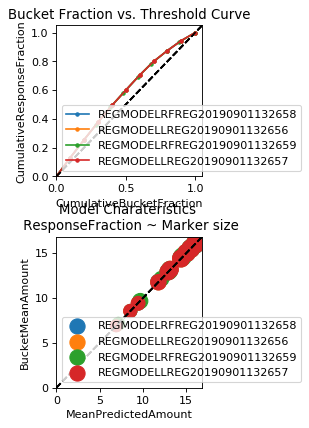

In [35]:
RFREGModel.plot_eval_matrics(comparison=True)
LREGModel.plot_eval_matrics(comparison=True)
RFREGModel2.plot_eval_matrics(comparison=True)
LREGModel2.plot_eval_matrics(comparison=True)

In [36]:
SelectModel = RFREGModel

scoreVariable = SelectModel.get_score_variable()
scoreLabel = SelectModel.get_score_label()

TestDataset = mltk.score_processed_dataset(TestDataset, SelectModel, edges=None, score_label=None, fill_missing=0)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.0s finished


# 7. Adgest Scoring/Ranking Edges

In [37]:
quantiles=[0, 0.2, 0.35, 0.5, 0.65, 0.75, 0.85, 0.90, 0.95, 0.98, 1.0]
edges, threshold = mltk.get_score_cutoffs(ResultsSet=TestDataset, quantiles=quantiles, target_variable=targetVariable, problem_type='regression', score_variable=scoreVariable)
print('Threshold', threshold)
print('Edges', edges)

Threshold 0.0
Edges [0.0, 8.7962, 11.8351, 13.0141, 14.5976, 15.0456, 15.503, 15.7302, 15.9219, 16.3619, inf]


In [38]:
SelectModel.set_score_edges(edges)

# 8. Test Selected Model

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.0s finished


,MinPredictedAmount,MaxPredictedAmount,MeanPredictedAmount,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Score,,,,,,,,,,,
1,5.05,8.8,7.73,401,3103,0.201,0.125,7.74,1,1,12.4
2,8.8,11.8,10,299,2990,0.149,0.121,10,0.799,0.875,13.5
3,11.8,13,12.7,301,3840,0.15,0.155,12.8,0.65,0.754,14.4
4,13,14.6,13.4,299,4022,0.149,0.163,13.5,0.499,0.599,14.8
5,14.6,15,14.9,201,2986,0.101,0.121,14.9,0.35,0.436,15.4
6,15,15.5,15.3,200,3064,0.1,0.124,15.3,0.249,0.316,15.7
7,15.5,15.7,15.7,100,1560,0.05,0.063,15.6,0.149,0.192,15.9
8,15.7,15.9,15.8,100,1571,0.05,0.0635,15.7,0.0995,0.129,16
9,15.9,16.4,16.1,59,957,0.0295,0.0387,16.2,0.0495,0.0653,16.3


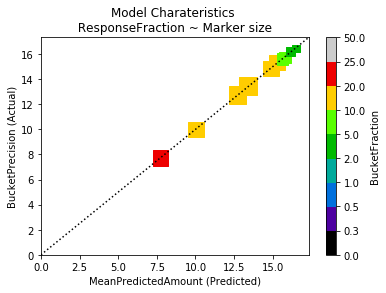

In [39]:
TestDataset = mltk.score_processed_dataset(TestDataset, SelectModel, edges=None, score_label=None, fill_missing=0)
Robustnesstable = mltk.robustness_table(ResultsSet=TestDataset, target_variable=targetVariable, score_variable=scoreVariable,  score_label=scoreLabel, condensed=False, show_plot=True)
Robustnesstable.style.background_gradient(cmap='RdYlGn').set_precision(3)

In [40]:
print('RMSE =', SelectModel.get_rmse())
print('R^2 =', SelectModel.get_r2())

RMSE = 0.3190599867814656
R^2 = 0.9889149574413394


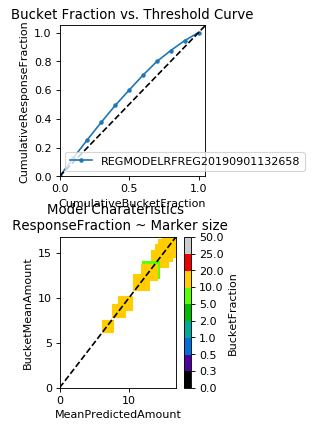

In [41]:
SelectModel.plot_eval_matrics(comparison=False)

## Cite as
```
@misc{mltk2019,
  author =  "Sumudu Tennakoon",
  title = "MLToolKit(mltk): A Simplified Toolkit for End-To-End Machine Learing Projects",
  year = 2019,
  publisher = "GitHub",
  howpublished = {\url{https://mltoolkit.github.io/mltk/}},
  version = "0.1.7"
}
```

<hr>
This notebook and related materials were developed by Sumudu Tennakoon to demostrate the MLToolkit python library and its interoperability with the standared Python data analysis and machine learning packages (e.g. Pandas, Sci-kitlearn, Statsmodel, TensorFlow, Catboost, etc.)
Create Date: July 15, 2019; Last Update: August 31, 2019. 
Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)